Problem 1

In [16]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
file_name = os.getcwd()+'/quiz2_dataset1.csv'
csv = pd.read_csv(file_name)
df = pd.DataFrame(csv)
df.head()
# process data
lr_x = df.loc[:,'Heat Flux']
lr_y = df.loc[:, 'Skin Temperature']
lr_x = lr_x.values.reshape(-1,1)
lr_y = lr_y.values.reshape(-1,1)
# split data
x_train,x_test,y_train,y_test = train_test_split(lr_x,lr_y,train_size = 0.8)
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)
mse_lr = mean_squared_error(y_test,y_pred)
w = lr_model.coef_
b = lr_model.intercept_
lr_coef = w[0][0]
lr_intercept = b[0]
print("the equation for the line that results from the regression is y =",lr_coef,'* x +',lr_intercept)

the equation for the line that results from the regression is y = -0.21790350012664153 * x + 33.14986527178327


Problem 2

In [46]:
# custom decision tree
import operator
import numpy as np
import pandas as pd
import os
# load data
def load_dataSet():
    file_name = os.getcwd()+'/quiz2_dataset2.csv'
    dataSet = pd.read_csv(file_name)
    labelSet = list(dataSet.columns.values)
    dataSet = dataSet.values
    return dataSet,labelSet

# calculate entropy
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        # current sample type
        currentLabel = featVec[-1]
        # if current type not in labelCounts,create it.
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        shannonEnt -= prob*np.log2(prob)
    return shannonEnt

# split dataset
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        # Extract the same data features
        if featVec[axis] == value:
            reducedFeatVec = list(featVec[:axis])
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

# choose the best split feature
def chooseBestFeature(dataSet):
    numFeature = len(dataSet[0])-1
    baseEntroy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeature):
        featureList = [example[i] for example in dataSet]
        uniqueVals = set(featureList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += prob * np.log2(prob)
        inforGain = baseEntroy - newEntropy 
        if inforGain > bestInfoGain:
            bestInfoGain = inforGain
            bestFeature = i
    return bestFeature

# construct the decision tree recursively
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount += 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]
# construct the decision tree
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    if (len(dataSet[0]) == 1):
        return majorityCnt(classList)
    bestFeat = chooseBestFeature(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree
if __name__ == '__main__':
    dataSet, labelSet = load_dataSet()
    shannonEnt = calcShannonEnt(dataSet)
    tree= createTree(dataSet, labelSet)
    print (tree)

{'A': {'T': {'B': {'T': {'C': {'T': 5, 'F': 0}}, 'F': {'C': {'T': 20, 'F': 0}}}}, 'F': {'B': {'T': {'C': {'T': -20, 'F': 25}}, 'F': {'C': {'T': -5, 'F': -25}}}}}}


In [57]:
# sklearn decision tree
import numpy as np
import pandas as pd
import os
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
file_name = os.getcwd()+"/quiz2_dataset2_2.csv"
csv = pd.read_csv(file_name)
tree_df = pd.DataFrame(csv)
tree_df.loc[tree_df['A'] == 'T'] = 1
tree_df.loc[tree_df['A'] == 'F'] = 0
tree_df.loc[tree_df['B'] == 'T'] = 1
tree_df.loc[tree_df['B'] == 'F'] = 0
tree_df.loc[tree_df['C'] == 'T'] = 1
tree_df.loc[tree_df['C'] == 'F'] = 0
cols = ["A","B","C"]
X = tree_df[cols]
Y = tree_df['result']
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size = 0.8)
dt_model = tree.DecisionTreeClassifier(criterion="entropy")
dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)
print("accuracy is %2.3f" % accuracy_score(y_test, y_pred))

accuracy is 1.000


Problem 4

In [73]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
file_name = os.getcwd()+"/quiz2_dataset4.csv"
csv = pd.read_csv(file_name)
svm_df = pd.DataFrame(csv)
svm_df.loc[svm_df['Lagrange Multiplier'] == 65.5261] = 1
cols = ["x1","x2","y"]
X = svm_df[cols]
Y = svm_df['Lagrange Multiplier']
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size = 0.8)
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x_train,y_train)
y_pred = svm_model.predict(x_test)
print("accuracy is %2.3f" % accuracy_score(y_test, y_pred))

accuracy is 0.500


Text(33.0, 0.5, 'true value')

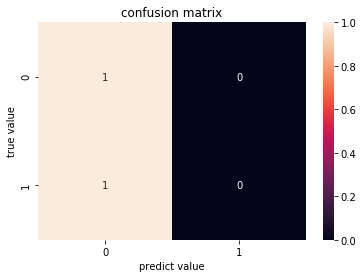

In [71]:
cm = confusion_matrix(y_test, y_pred)
fig,ax = plt.subplots()
sns.heatmap(cm,annot = True,ax = ax)
ax.set_title('confusion matrix') 
ax.set_xlabel('predict value') 
ax.set_ylabel('true value')

In [75]:
w = svm_model.coef_
b = svm_model.intercept_
print(w)
print(b)

[[0.522043   0.58432178 0.27277088]]
[-1.69077084]
